In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [4]:
data = {"year":[2015,2016,2017,2018,2019,2020,2021,2022,2023],
    "inflation":[11.9,8.0,9.6,31.2,41.2,36.5,40.5,39.5,49.5]
}

In [9]:
df = pd.DataFrame(data)


In [12]:
df.head()

,year,inflation
0,2015,11.9
1,2016,8.0
2,2017,9.6
3,2018,31.2
4,2019,41.2


In [14]:
df.to_csv("inflation.csv", index = False)

In [15]:
df = pd.read_csv("inflation.csv")
df

,year,inflation
0,2015,11.9
1,2016,8.0
2,2017,9.6
3,2018,31.2
4,2019,41.2
5,2020,36.5
6,2021,40.5
7,2022,39.5
8,2023,49.5


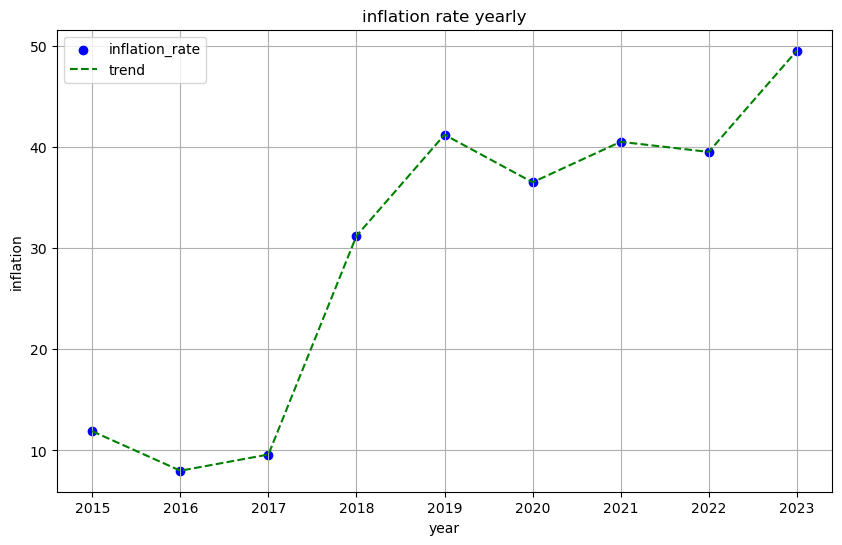

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(df["year"], df["inflation"], color = "blue", label = "inflation_rate")
plt.plot(df["year"], df["inflation"], color = "green", linestyle = "--", label = "trend")
plt.xlabel("year")
plt.ylabel("inflation")
plt.title("inflation rate yearly")
plt.legend()
plt.grid(True)
plt.show()

In [20]:
X = df["year"].values.reshape(-1,1) # reshape to 2D array
y = df["inflation"].values.reshape(-1,1) # reshape to 2D array



In [21]:
model = LinearRegression() # create a linear regression model
model.fit(X, y) # train the model

print("Intercept:", model.intercept_) # print the intercept
print("Coefficient:", model.coef_[0])# print the coefficient

Intercept: [-10469.03333333]
Coefficient: [5.2]


In [30]:
year_to_predict = np.array([[2024]]) # year to predict
predicted_inflation = model.predict(year_to_predict) # predict the inflation rate
print("Predicted inflation rate for year", year_to_predict, ":", predicted_inflation)

Predicted inflation rate for year [[2024]] : [[55.76666667]]


In [32]:
year_to_predict_2025 = np.array([[2025]]) # year to predict
predicted_inflation = model.predict(year_to_predict_2025) # predict the inflation rate
print("Predicted inflation rate for year", year_to_predict_2025, ":", predicted_inflation)

Predicted inflation rate for year [[2025]] : [[60.96666667]]


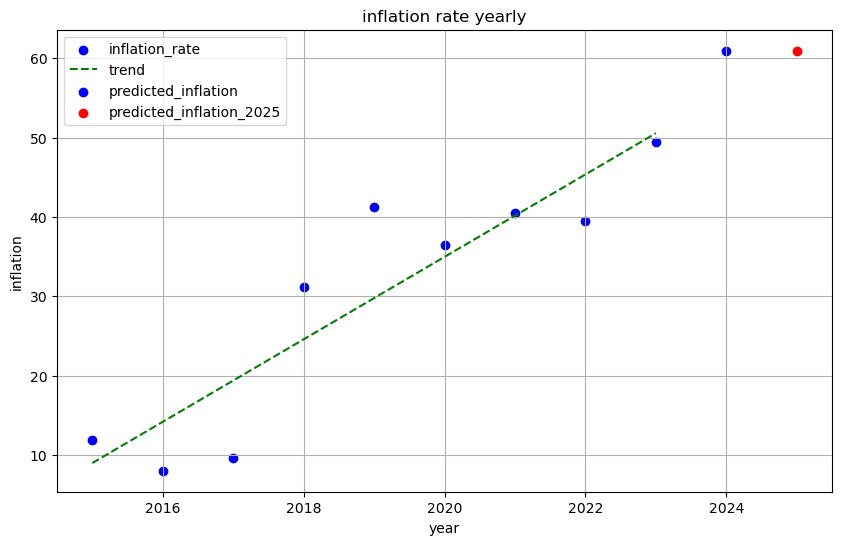

In [46]:
plt.figure(figsize=(10,6))
plt.scatter(df["year"], df["inflation"], color = "blue", label = "inflation_rate")
plt.plot(df["year"], model.predict(X), color = "green", linestyle = "--", label = "trend")
plt.scatter(2024, predicted_inflation, color = "blue", label = "predicted_inflation")
plt.scatter(2025, predicted_inflation, color = "red", label = "predicted_inflation_2025")
plt.xlabel("year")
plt.ylabel("inflation")
plt.title("inflation rate yearly")
plt.legend()
plt.grid(True)
plt.show()

In [48]:
y_prdect = model.predict(X)

In [49]:
r2 = r2_score(y, y_prdect)
print("R2 score: ", r2)

R2 score:  0.8205709199053348
